## Importing Packages

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request, urllib.parse
from urllib.error import HTTPError, URLError
from urllib.request import urlretrieve as retrieve
import json
import requests
from bs4 import BeautifulSoup

## Uploading CSV File

In [2]:
coral = pd.read_csv(r"C:\Users\datre\OneDrive\Documents\Graduate School\Summer '20\Okazaki_2013.tab", sep = '\t', skiprows = 35)

In [3]:
coral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Treat                                                             142 non-null    object 
 1   Date                                                              142 non-null    object 
 2   Species                                                           142 non-null    object 
 3   ID (coral)                                                        142 non-null    object 
 4   Omega Arg (Calculated using CO2SYS)                               142 non-null    float64
 5   Calc rate CaCO3 [mmol/m**2/h] (Alkalinity anomaly technique ...)  140 non-null    float64
 6   SA [cm**2]                                                        139 non-null    float64
 7   Temp [°C]                          

In [4]:
coral

,Treat,Date,Species,ID (coral),Omega Arg (Calculated using CO2SYS),Calc rate CaCO3 [mmol/m**2/h] (Alkalinity anomaly technique ...),SA [cm**2],Temp [°C],Sal,PN [mmol/m**2/h],...,"pH (total scale, Potentiometric)",CSC flag (Calculated using seacarb afte...),CO2 [µmol/kg] (Calculated using seacarb afte...),pCO2water_SST_wet [µatm] (Calculated using seacarb afte...),fCO2water_SST_wet [µatm] (Calculated using seacarb afte...),[HCO3]- [µmol/kg] (Calculated using seacarb afte...),[CO3]2- [µmol/kg] (Calculated using seacarb afte...),DIC [µmol/kg] (Calculated using seacarb afte...),Omega Arg (Calculated using seacarb afte...),Omega Cal (Calculated using seacarb afte...)
0,ambient,2007-09-12,Siderastrea radians (coral),A1,3.94,5.51,73.2,29.80,33.520,14.575,...,8.072,8,8.97,353,352,1625,239,1873,3.92,5.87
1,ambient,2007-09-12,Siderastrea radians (coral),A10,4.12,5.55,45.9,30.32,33.390,15.710,...,8.089,8,8.48,337,336,1609,250,1867,4.11,6.16
2,ambient,2007-09-12,Siderastrea radians (coral),A13,4.12,6.50,30.3,30.32,33.390,25.255,...,8.089,8,8.48,337,336,1609,250,1867,4.11,6.16
3,ambient,2007-09-12,Siderastrea radians (coral),A5,3.94,4.51,61.4,29.85,33.520,15.620,...,8.072,8,8.96,353,352,1625,239,1872,3.93,5.88
4,ambient,2007-09-12,Solenastrea hyades (coral),S2,3.94,NaN,NaN,29.80,33.520,NaN,...,8.072,8,8.97,353,352,1625,239,1873,3.92,5.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,high CO2,2009-03-31,Siderastrea radians (coral),A23,3.32,3.89,42.6,26.41,37.343,10.770,...,7.951,8,14.10,522,520,1872,201,2086,3.15,4.74
138,high CO2,2009-03-31,Siderastrea radians (coral),A24,3.01,5.31,33.3,27.35,37.334,18.920,...,7.908,8,15.68,594,592,1919,193,2128,3.04,4.56
139,high CO2,2009-03-31,Siderastrea radians (coral),A25,2.76,7.84,20.5,27.35,37.334,32.760,...,7.863,8,17.68,670,668,1950,177,2145,2.78,4.18
140,high CO2,2009-03-31,Solenastrea hyades (coral),S21,2.88,5.71,176.5,26.41,37.343,12.920,...,7.886,8,16.49,611,609,1886,174,2076,2.73,4.11


For ease of understanding, a fahrenheit temperature column will be added. Additionally, column labels will be shortened for coding efficiency. As of now, the Treat column is categorical and considered an object, for analyses purposes, this column will be changed to binary category column.

## Changing Variables

In [5]:
temp_f = (coral["Temp [°C]"] * 9/5) + 32
temp_f

0      85.640
1      86.576
2      86.576
3      85.730
4      85.640
        ...  
137    79.538
138    81.230
139    81.230
140    79.538
141    79.538
Name: Temp [°C], Length: 142, dtype: float64

In [6]:
coral["Treat"].head(77)

0      ambient
1      ambient
2      ambient
3      ambient
4      ambient
        ...   
72     ambient
73     ambient
74     ambient
75    high CO2
76    high CO2
Name: Treat, Length: 77, dtype: object

The separation from ambient to high CO2 is at observation 75

In [7]:
coral["Treat"] = coral["Treat"].astype('category')
coral["Treat"] = coral["Treat"].cat.codes
coral.dtypes

Treat                                                                  int8
Date                                                                 object
Species                                                              object
ID (coral)                                                           object
Omega Arg (Calculated using CO2SYS)                                 float64
Calc rate CaCO3 [mmol/m**2/h] (Alkalinity anomaly technique ...)    float64
SA [cm**2]                                                          float64
Temp [°C]                                                           float64
Sal                                                                 float64
PN [mmol/m**2/h]                                                    float64
AT [µmol/kg] (Potentiometric titration)                             float64
pH (total scale, Potentiometric)                                    float64
CSC flag (Calculated using seacarb afte...)                           int64
CO2 [µmol/kg

## Cleaning DataFrame

In [8]:
treat = coral["Treat"]
date = coral["Date"]
species = coral["Species"]
temp_c = coral["Temp [°C]"]
sal = coral["Sal"]
calc_rate = coral["Calc rate CaCO3 [mmol/m**2/h] (Alkalinity anomaly technique ...)"]
pH = coral["pH (total scale, Potentiometric)"]
CO2 = coral["CO2 [µmol/kg] (Calculated using seacarb afte...)"]
pCO2 = coral["pCO2water_SST_wet [µatm] (Calculated using seacarb afte...)"]
HCO3 = coral["[HCO3]- [µmol/kg] (Calculated using seacarb afte...)"]

In [9]:
coral_clean = coral.rename(columns={"Treat":"treat", "Date":"date", "Species":"species", "Temp [°C]":"temp_c", "Sal":"sal", "Calc rate CaCO3 [mmol/m**2/h] (Alkalinity anomaly technique ...)":"calc_rate", "pH (total scale, Potentiometric)":"pH", "CO2 [µmol/kg] (Calculated using seacarb afte...)":"CO2", "pCO2water_SST_wet [µatm] (Calculated using seacarb afte...)":"pCO2", "[HCO3]- [µmol/kg] (Calculated using seacarb afte...)":"HCO3"})
del coral_clean["ID (coral)"]
del coral_clean["Omega Arg (Calculated using CO2SYS)"]
del coral_clean["SA [cm**2]"]
del coral_clean["PN [mmol/m**2/h]"]
del coral_clean["AT [µmol/kg] (Potentiometric titration)"]
del coral_clean["CSC flag (Calculated using seacarb afte...)"]
del coral_clean["fCO2water_SST_wet [µatm] (Calculated using seacarb afte...)"]
del coral_clean["[CO3]2- [µmol/kg] (Calculated using seacarb afte...)"]
del coral_clean["DIC [µmol/kg] (Calculated using seacarb afte...)"]
del coral_clean["Omega Arg (Calculated using seacarb afte...)"]
del coral_clean["Omega Cal (Calculated using seacarb afte...)"]
coral_clean["temp_f"] = temp_f
coral_clean.head()

,treat,date,species,calc_rate,temp_c,sal,pH,CO2,pCO2,HCO3,temp_f
0,0,2007-09-12,Siderastrea radians (coral),5.51,29.80,33.52,8.072,8.97,353,1625,85.640
1,0,2007-09-12,Siderastrea radians (coral),5.55,30.32,33.39,8.089,8.48,337,1609,86.576
2,0,2007-09-12,Siderastrea radians (coral),6.50,30.32,33.39,8.089,8.48,337,1609,86.576
3,0,2007-09-12,Siderastrea radians (coral),4.51,29.85,33.52,8.072,8.96,353,1625,85.730
4,0,2007-09-12,Solenastrea hyades (coral),NaN,29.80,33.52,8.072,8.97,353,1625,85.640


Variables not being used were removed from this data set and the fahrenheit column was added. 

## Finding Null Values

In [10]:
coral_clean.isnull().sum()

treat        0
date         0
species      0
calc_rate    2
temp_c       0
sal          0
pH           0
CO2          0
pCO2         0
HCO3         0
temp_f       0
dtype: int64

In [11]:
coral_clean = coral_clean.dropna()
coral_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 141
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   treat      140 non-null    int8   
 1   date       140 non-null    object 
 2   species    140 non-null    object 
 3   calc_rate  140 non-null    float64
 4   temp_c     140 non-null    float64
 5   sal        140 non-null    float64
 6   pH         140 non-null    float64
 7   CO2        140 non-null    float64
 8   pCO2       140 non-null    int64  
 9   HCO3       140 non-null    int64  
 10  temp_f     140 non-null    float64
dtypes: float64(6), int64(2), int8(1), object(2)
memory usage: 12.2+ KB


In [12]:
coral_clean.isnull().sum()

treat        0
date         0
species      0
calc_rate    0
temp_c       0
sal          0
pH           0
CO2          0
pCO2         0
HCO3         0
temp_f       0
dtype: int64

There were two null values in the calcification rate column. Since there is no way to easily estimate this value at this time, those two observations were removed.

## Finding Duplicates

In [13]:
coral_clean[coral_clean.duplicated()]

,treat,date,species,calc_rate,temp_c,sal,pH,CO2,pCO2,HCO3,temp_f


There are no duplicate observations in this data.

# Wedsite Data

In [48]:
URL = "https://data.nodc.noaa.gov/ncei/ocads/data/0109904/"
filetype = ".csv"

In [36]:
r = requests.get("https://data.nodc.noaa.gov/ncei/ocads/data/0109904/")
print(r.text[0:500])

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<html>
 <head>
  <title>Index of /ncei/ocads/data/0109904</title>
 </head>
 <body>
<h1>Index of /ncei/ocads/data/0109904</h1>
<table><tr><th><img src="/icons/blank.gif" alt="[ICO]"></th><th><a href="?C=N;O=D">Name</a></th><th><a href="?C=M;O=A">Last modified</a></th><th><a href="?C=S;O=A">Size</a></th><th><a href="?C=D;O=A">Description</a></th></tr><tr><th colspan="5"><hr></th></tr>
<tr><td valign="top"><img src="/icons/back.gif" alt="[DIR]


In [37]:
soup = BeautifulSoup(r.text, "html.parser")

## Finding All Data Files

In [50]:
for link in soup.find_all("a"):
    files = link.get("href")
    if filetype in files:
        print(files)

GraysRf_81W_31N_Aug2016_Jun2017.csv
GraysRf_81W_31N_Aug2016_Jun2017_QFLog.csv
GraysRf_81W_31N_Aug2017_Aug2018.csv
GraysRf_81W_31N_Aug2017_Aug2018_QFLog.csv
GraysRf_81W_31N_Jan2013_Oct2013.csv
GraysRf_81W_31N_Jan2013_Oct2013_QFLog.csv
GraysRf_81W_31N_Jul2006_Jun2007.csv
GraysRf_81W_31N_Jul2006_Jun2007_QF_Log.csv
GraysRf_81W_31N_Jul2009_May2010.csv
GraysRf_81W_31N_Jun2007_Jun2008.csv
GraysRf_81W_31N_Jun2008_May2009.csv
GraysRf_81W_31N_Jun2008_May2009_QF_Log.csv
GraysRf_81W_31N_Jun2017_Jul2017.csv
GraysRf_81W_31N_Jun2017_Jul2017_QFLog.csv
GraysRf_81W_31N_May2010_Sep2010.csv
GraysRf_81W_31N_May2010_Sep2010_.csv
GraysRf_81W_31N_May2010_Sep2010_QFLog.csv
GraysRf_81W_31N_Oct2013_Oct2014.csv
GraysRf_81W_31N_Oct2013_Oct2014_QFLog.csv
GraysRf_81W_31N_Oct2014_Oct2015.csv
GraysRf_81W_31N_Oct2014_Oct2015_QFLog.csv
GraysRf_81W_31N_Sep2010_Sep2011.csv
GraysRf_81W_31N_Sep2010_Sep2011_QFLog.csv
GraysRf_81W_31N_Sep2011_Sep2012.csv
GraysRf_81W_31N_Sep2011_Sep2012_QFLog.csv
GraysRf_81W_31N_Sep2012_Jan2013

In [58]:
retrieve(URL, "GraysRf_81W_31N_Jun2007_Jun2008.csv")

('GraysRf_81W_31N_Jun2007_Jun2008.csv',
 <http.client.HTTPMessage at 0x1e5c1f07788>)

### Files of Interest

In [44]:
retrieve(URL, "GraysRf_81W_31N_Jun2007_Jun2008.csv")

<a href="GraysRf_81W_31N_Jun2007_Jun2008.csv">GraysRf_81W_31N_Jun2007_Jun2008.csv</a>


In [59]:
retrieve(URL, "GraysRf_81W_31N_Jun2008_May2009.csv")

('GraysRf_81W_31N_Jun2008_May2009.csv',
 <http.client.HTTPMessage at 0x1e5c1f001c8>)

## Opening Files

In [63]:
gray1 = pd.read_csv(r"C:\Users\datre\OneDrive\Documents\Graduate School\Summer '20\GraysRf_81W_31N_Jun2007_Jun2008.csv", skiprows = 4)
gray2 = pd.read_csv(r"C:\Users\datre\OneDrive\Documents\Graduate School\Summer '20\GraysRf_81W_31N_Jun2008_May2009.csv", skiprows = 4)

In [64]:
gray1.head()

,Mooring Name,Latitude,Longitude,Date,Time,xCO2 SW (wet) (umol/mol),CO2 SW QF,H2O SW (mmol/mol),xCO2 Air (wet) (umol/mol),CO2 Air QF,...,SST (C),Salinity,xCO2 SW (dry) (umol/mol),xCO2 Air (dry) (umol/mol),fCO2 SW (sat) uatm,fCO2 Air (sat) uatm,dfCO2,pCO2 SW (sat) uatm,pCO2 Air (sat) uatm,dpCO2
0,GraysReef_81W_31N,31.4,-80.87,6/26/2007,21:13:00,396.5,2,12.77,377.6,2,...,27.890,34.854,401.6,382.7,389.7,371.4,18.3,390.9,372.5,18.4
1,GraysReef_81W_31N,31.4,-80.87,6/26/2007,21:43:00,396.3,2,12.79,377.8,2,...,27.832,34.868,401.5,383.0,389.5,371.6,17.9,390.7,372.7,18.0
2,GraysReef_81W_31N,31.4,-80.87,6/26/2007,22:13:00,390.8,2,13.40,377.8,2,...,27.690,34.854,396.1,383.0,384.4,371.7,12.7,385.6,372.8,12.8
3,GraysReef_81W_31N,31.4,-80.87,6/26/2007,22:43:00,398.1,2,13.44,378.1,2,...,27.797,34.890,403.5,383.3,391.5,371.9,19.6,392.7,373.0,19.7
4,GraysReef_81W_31N,31.4,-80.87,6/26/2007,23:13:00,398.1,2,14.02,378.3,2,...,27.755,34.903,403.8,383.7,391.7,372.3,19.5,393.0,373.4,19.6


In [65]:
gray2.head()

,Mooring Name,Latitude,Longitude,Date,Time,xCO2 SW (wet) (umol/mol),CO2 SW QF,H2O SW (mmol/mol),xCO2 Air (wet) (umol/mol),CO2 Air QF,...,SST (C),Salinity,xCO2 SW (dry) (umol/mol),xCO2 Air (dry) (umol/mol),fCO2 SW (sat) uatm,fCO2 Air (sat) uatm,dfCO2,pCO2 SW (sat) uatm,pCO2 Air (sat) uatm,dpCO2
0,GraysRf_81W_31N,31.4,-80.87,6/16/2008,18:19:00,460.9,2,17.90,393.2,2,...,-999.0,-999.0,469.3,398.8,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,GraysRf_81W_31N,31.4,-80.87,6/16/2008,18:49:00,467.2,2,17.86,389.8,2,...,-999.0,-999.0,475.7,395.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,GraysRf_81W_31N,31.4,-80.87,6/16/2008,18:49:00,467.2,2,17.86,389.8,2,...,-999.0,-999.0,475.7,395.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,GraysRf_81W_31N,31.4,-80.87,6/16/2008,19:19:00,464.1,2,18.35,386.5,2,...,-999.0,-999.0,472.8,391.4,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
4,GraysRf_81W_31N,31.4,-80.87,6/16/2008,19:19:00,464.1,2,18.35,386.5,2,...,-999.0,-999.0,472.8,391.4,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [72]:
gray = pd.merge(gray1, gray2, how = "outer")
gray

,Mooring Name,Latitude,Longitude,Date,Time,xCO2 SW (wet) (umol/mol),CO2 SW QF,H2O SW (mmol/mol),xCO2 Air (wet) (umol/mol),CO2 Air QF,...,SST (C),Salinity,xCO2 SW (dry) (umol/mol),xCO2 Air (dry) (umol/mol),fCO2 SW (sat) uatm,fCO2 Air (sat) uatm,dfCO2,pCO2 SW (sat) uatm,pCO2 Air (sat) uatm,dpCO2
0,GraysReef_81W_31N,31.4,-80.87,6/26/2007,21:13:00,396.5,2,12.77,377.6,2,...,27.890,34.854,401.6,382.7,389.7,371.4,18.3,390.9,372.5,18.4
1,GraysReef_81W_31N,31.4,-80.87,6/26/2007,21:43:00,396.3,2,12.79,377.8,2,...,27.832,34.868,401.5,383.0,389.5,371.6,17.9,390.7,372.7,18.0
2,GraysReef_81W_31N,31.4,-80.87,6/26/2007,22:13:00,390.8,2,13.40,377.8,2,...,27.690,34.854,396.1,383.0,384.4,371.7,12.7,385.6,372.8,12.8
3,GraysReef_81W_31N,31.4,-80.87,6/26/2007,22:43:00,398.1,2,13.44,378.1,2,...,27.797,34.890,403.5,383.3,391.5,371.9,19.6,392.7,373.0,19.7
4,GraysReef_81W_31N,31.4,-80.87,6/26/2007,23:13:00,398.1,2,14.02,378.3,2,...,27.755,34.903,403.8,383.7,391.7,372.3,19.5,393.0,373.4,19.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5829,GraysRf_81W_31N,31.4,-80.87,5/17/2009,21:17:00,470.5,2,13.33,387.6,2,...,25.097,36.019,476.9,392.4,461.3,379.5,81.8,462.8,380.8,82.0
5830,GraysRf_81W_31N,31.4,-80.87,5/18/2009,0:17:00,472.9,2,13.85,388.3,2,...,25.444,35.438,479.6,392.9,463.8,380.0,83.8,465.3,381.2,84.1
5831,GraysRf_81W_31N,31.4,-80.87,5/18/2009,3:17:00,487.3,2,14.36,397.7,2,...,25.221,35.241,494.4,403.1,478.6,390.2,88.4,480.1,391.4,88.7
5832,GraysRf_81W_31N,31.4,-80.87,5/18/2009,6:17:00,475.4,2,12.11,387.7,2,...,25.183,35.392,481.2,392.1,465.3,379.1,86.2,466.7,380.3,86.4


In [73]:
gray.isnull().sum()

Mooring Name                  0
Latitude                      0
Longitude                     0
Date                          0
Time                          0
xCO2  SW (wet) (umol/mol)     0
CO2 SW QF                     0
H2O SW (mmol/mol)             0
xCO2  Air (wet) (umol/mol)    0
CO2 Air QF                    0
H2O Air (mmol/mol)            0
Licor Atm Pressure  (hPa)     0
Licor Temp (C)                0
MAPCO2 %O2                    0
SST (C)                       0
Salinity                      0
xCO2  SW (dry) (umol/mol)     0
xCO2  Air (dry) (umol/mol)    0
fCO2  SW (sat) uatm           0
fCO2  Air (sat) uatm          0
dfCO2                         0
pCO2 SW (sat) uatm            0
pCO2 Air (sat) uatm           0
dpCO2                         0
dtype: int64

In [74]:
gray[gray.duplicated()]

,Mooring Name,Latitude,Longitude,Date,Time,xCO2 SW (wet) (umol/mol),CO2 SW QF,H2O SW (mmol/mol),xCO2 Air (wet) (umol/mol),CO2 Air QF,...,SST (C),Salinity,xCO2 SW (dry) (umol/mol),xCO2 Air (dry) (umol/mol),fCO2 SW (sat) uatm,fCO2 Air (sat) uatm,dfCO2,pCO2 SW (sat) uatm,pCO2 Air (sat) uatm,dpCO2
2986,GraysRf_81W_31N,31.4,-80.87,6/16/2008,18:49:00,467.2,2,17.86,389.8,2,...,-999.0,-999.0,475.7,395.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2988,GraysRf_81W_31N,31.4,-80.87,6/16/2008,19:19:00,464.1,2,18.35,386.5,2,...,-999.0,-999.0,472.8,391.4,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2990,GraysRf_81W_31N,31.4,-80.87,6/16/2008,19:49:00,460.5,2,18.75,389.5,2,...,-999.0,-999.0,469.3,395.1,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2992,GraysRf_81W_31N,31.4,-80.87,6/16/2008,20:19:00,462.3,2,18.93,390.2,2,...,-999.0,-999.0,471.2,395.9,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2994,GraysRf_81W_31N,31.4,-80.87,6/16/2008,20:49:00,458.9,2,18.87,391.3,2,...,-999.0,-999.0,467.7,397.3,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2996,GraysRf_81W_31N,31.4,-80.87,6/16/2008,21:19:00,458.3,2,19.81,391.8,2,...,-999.0,-999.0,467.6,398.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2998,GraysRf_81W_31N,31.4,-80.87,6/16/2008,21:49:00,458.7,2,18.65,390.2,2,...,-999.0,-999.0,467.4,396.4,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [75]:
gray.duplicated().sum()

7

In [77]:
gray.drop_duplicates(keep = "first")

,Mooring Name,Latitude,Longitude,Date,Time,xCO2 SW (wet) (umol/mol),CO2 SW QF,H2O SW (mmol/mol),xCO2 Air (wet) (umol/mol),CO2 Air QF,...,SST (C),Salinity,xCO2 SW (dry) (umol/mol),xCO2 Air (dry) (umol/mol),fCO2 SW (sat) uatm,fCO2 Air (sat) uatm,dfCO2,pCO2 SW (sat) uatm,pCO2 Air (sat) uatm,dpCO2
0,GraysReef_81W_31N,31.4,-80.87,6/26/2007,21:13:00,396.5,2,12.77,377.6,2,...,27.890,34.854,401.6,382.7,389.7,371.4,18.3,390.9,372.5,18.4
1,GraysReef_81W_31N,31.4,-80.87,6/26/2007,21:43:00,396.3,2,12.79,377.8,2,...,27.832,34.868,401.5,383.0,389.5,371.6,17.9,390.7,372.7,18.0
2,GraysReef_81W_31N,31.4,-80.87,6/26/2007,22:13:00,390.8,2,13.40,377.8,2,...,27.690,34.854,396.1,383.0,384.4,371.7,12.7,385.6,372.8,12.8
3,GraysReef_81W_31N,31.4,-80.87,6/26/2007,22:43:00,398.1,2,13.44,378.1,2,...,27.797,34.890,403.5,383.3,391.5,371.9,19.6,392.7,373.0,19.7
4,GraysReef_81W_31N,31.4,-80.87,6/26/2007,23:13:00,398.1,2,14.02,378.3,2,...,27.755,34.903,403.8,383.7,391.7,372.3,19.5,393.0,373.4,19.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5829,GraysRf_81W_31N,31.4,-80.87,5/17/2009,21:17:00,470.5,2,13.33,387.6,2,...,25.097,36.019,476.9,392.4,461.3,379.5,81.8,462.8,380.8,82.0
5830,GraysRf_81W_31N,31.4,-80.87,5/18/2009,0:17:00,472.9,2,13.85,388.3,2,...,25.444,35.438,479.6,392.9,463.8,380.0,83.8,465.3,381.2,84.1
5831,GraysRf_81W_31N,31.4,-80.87,5/18/2009,3:17:00,487.3,2,14.36,397.7,2,...,25.221,35.241,494.4,403.1,478.6,390.2,88.4,480.1,391.4,88.7
5832,GraysRf_81W_31N,31.4,-80.87,5/18/2009,6:17:00,475.4,2,12.11,387.7,2,...,25.183,35.392,481.2,392.1,465.3,379.1,86.2,466.7,380.3,86.4


## Cleaning Dataframe

In [104]:
date = gray["Date"]
time = gray["Time"]
temp_c = gray["SST (C)"]
sal = gray["Salinity"]
pCO2 = gray["pCO2 SW (sat) uatm"]
xCO2 = gray["xCO2  SW (wet) (umol/mol)"]
atmP = gray["Licor Atm Pressure  (hPa)"]
dfCO2 = gray["dfCO2"]
dpCO2 = gray["dpCO2"]

In [94]:
gray_clean = gray.rename(columns={"Time":"time", "Date":"date", "SST (C)":"temp_c", "Salinity":"sal", "pCO2 SW (sat) uatm":"pCO2", "xCO2  SW (wet) (umol/mol)":"xCO2", "Licor Atm Pressure  (hPa)":"atmP"})
del gray_clean["Mooring Name"]
del gray_clean["Latitude"]
del gray_clean["Longitude"]
del gray_clean["pCO2 Air (sat) uatm"]
del gray_clean["fCO2  Air (sat) uatm"]
del gray_clean["fCO2  SW (sat) uatm"]
del gray_clean["xCO2  Air (dry) (umol/mol)"]
del gray_clean["MAPCO2 %O2"]
del gray_clean["Licor Temp (C)"]
del gray_clean["H2O Air (mmol/mol)"]
del gray_clean["CO2 Air QF"]
del gray_clean["xCO2  SW (dry) (umol/mol)"]
del gray_clean["xCO2  Air (wet) (umol/mol)"]
del gray_clean["H2O SW (mmol/mol)"]
del gray_clean["CO2 SW QF"]
gray_clean.head()

,date,time,xCO2,atmP,temp_c,sal,dfCO2,pCO2,dpCO2
0,6/26/2007,21:13:00,396.5,1023.1,27.890,34.854,18.3,390.9,18.4
1,6/26/2007,21:43:00,396.3,1022.8,27.832,34.868,17.9,390.7,18.0
2,6/26/2007,22:13:00,390.8,1022.7,27.690,34.854,12.7,385.6,12.8
3,6/26/2007,22:43:00,398.1,1022.7,27.797,34.890,19.6,392.7,19.7
4,6/26/2007,23:13:00,398.1,1022.6,27.755,34.903,19.5,393.0,19.6


In [97]:
gray_clean["sal"] = gray_clean["sal"].round(2)
gray_clean["temp_c"] = gray_clean["temp_c"].round(2)

In [105]:
gray_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5834 entries, 0 to 5833
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    5834 non-null   object 
 1   time    5834 non-null   object 
 2   xCO2    5834 non-null   float64
 3   atmP    5834 non-null   float64
 4   temp_c  5834 non-null   float64
 5   sal     5834 non-null   float64
 6   dfCO2   5834 non-null   float64
 7   pCO2    5834 non-null   float64
 8   dpCO2   5834 non-null   float64
dtypes: float64(7), object(2)
memory usage: 455.8+ KB


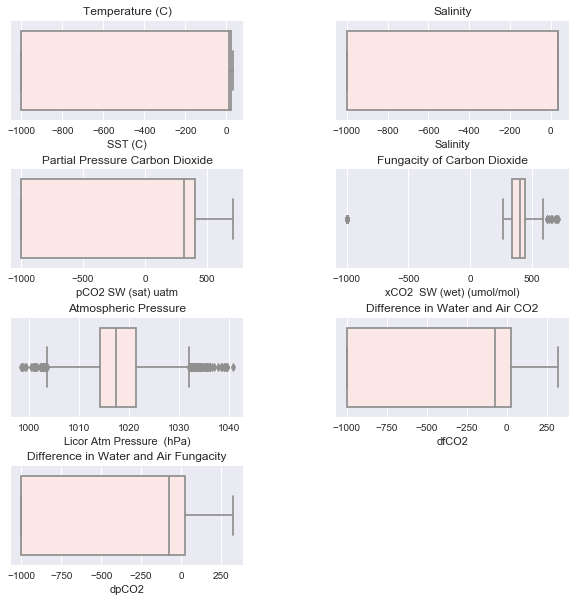

In [131]:
plt.style.use('seaborn')
fig, axis = plt.subplots(nrows = 4, ncols = 2)
fig.set_size_inches(10,10)
fig.subplots_adjust(wspace = 0.4, hspace = 0.5)

# plot 1
sns.boxplot(temp_c, color = 'mistyrose', ax = axis[0,0]).set_title('Temperature (C)')
# plot 2
sns.boxplot(sal, color = 'mistyrose', ax = axis[0,1]).set_title('Salinity')
# plot 3
sns.boxplot(pCO2, color = 'mistyrose', ax = axis[1,0]).set_title('Partial Pressure Carbon Dioxide')
# plot 4
sns.boxplot(xCO2, color = 'mistyrose', ax = axis[1,1]).set_title('Fungacity of Carbon Dioxide')
# plot 5
sns.boxplot(atmP, color = 'mistyrose', ax = axis[2,0]).set_title('Atmospheric Pressure')
# plot 6
sns.boxplot(dfCO2, color = 'mistyrose', ax = axis[2,1]).set_title('Difference in Water and Air CO2')
# plot 7
sns.boxplot(dpCO2, color = 'mistyrose', ax = axis[3,0]).set_title('Difference in Water and Air Fungacity')

ax = axis[3,1].set_visible(False)

There are some outliers in a few of the variables. I am struggling on finding a proper way to remove these outliers. I will continue to work towards properly removing these outliers. 